In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision treesdddd

In [2]:
# Import the data
df = pd.read_csv("E:/Technolabs/cleaned_final.csv")

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [4]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
# Train_test_split
from sklearn.model_selection import train_test_split
from sklearn import tree

In [6]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [7]:
# Instantiating DecisionTree by depth of 2
dt = tree.DecisionTreeClassifier(max_depth=2)

In [8]:
# Let's fit this on the train data
finch = dt.fit(X_train,y_train)

In [9]:
# Visualize this using GraphViz 
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

In [10]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image,display
import PIL
import warnings
from glob import glob

In [11]:
#pip install pydot

In [12]:
from graphviz import Graph

In [13]:
graph = graphviz.Source(dot_data)

[Text(167.4, 181.2, 'X[4] <= 1.5\ngini = 0.347\nsamples = 21331\nvalue = [16572, 4759]'),
 Text(83.7, 108.72, 'X[4] <= 0.5\ngini = 0.277\nsamples = 19083\nvalue = [15908, 3175]'),
 Text(41.85, 36.23999999999998, 'gini = 0.239\nsamples = 16441\nvalue = [14161, 2280]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.448\nsamples = 2642\nvalue = [1747, 895]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 568.0\ngini = 0.416\nsamples = 2248\nvalue = [664, 1584]'),
 Text(209.25, 36.23999999999998, 'gini = 0.473\nsamples = 65\nvalue = [40, 25]'),
 Text(292.95, 36.23999999999998, 'gini = 0.408\nsamples = 2183\nvalue = [624, 1559]')]

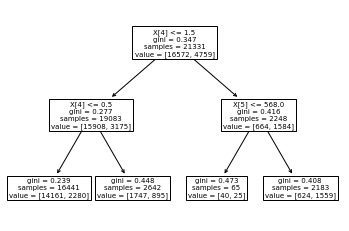

In [15]:
tree.plot_tree(finch)

In [16]:
# Let's get the proportion of training data in each sample
# Identify the index of the feature
features_response[:-1].index('PAY_1')

4

In [17]:
# Observe the shape of the training data
X_train.shape

(21331, 17)

In [18]:
# Let's get the proportion of training data in each sample
sum(X_train[:,4] <=1.5)/X_train.shape[0]

0.8946134733486475

In [19]:
# Let's calculate the class fraction of response variable in training set
np.mean(y_train)

0.223102526838873

#### Importance of max_depth


In [20]:
# Let's remove the max_depth value and see how it acts
dt.max_depth = None

In [21]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

In [23]:
graph = graphviz.Source(dot_data)

 It should be clear that without hyperparameters to govern the tree-growing process, extremely large and complex trees may result.

### Training Decision Trees: Node Impurity


In [24]:
pm0 = np.linspace(0.01,0.99,99)

In [25]:
pm0

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [26]:
# Misclassification rate
pm1 = 1-pm0
misclassification_rate = np.minimum(pm0,pm1)

In [27]:
misclassification_rate

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

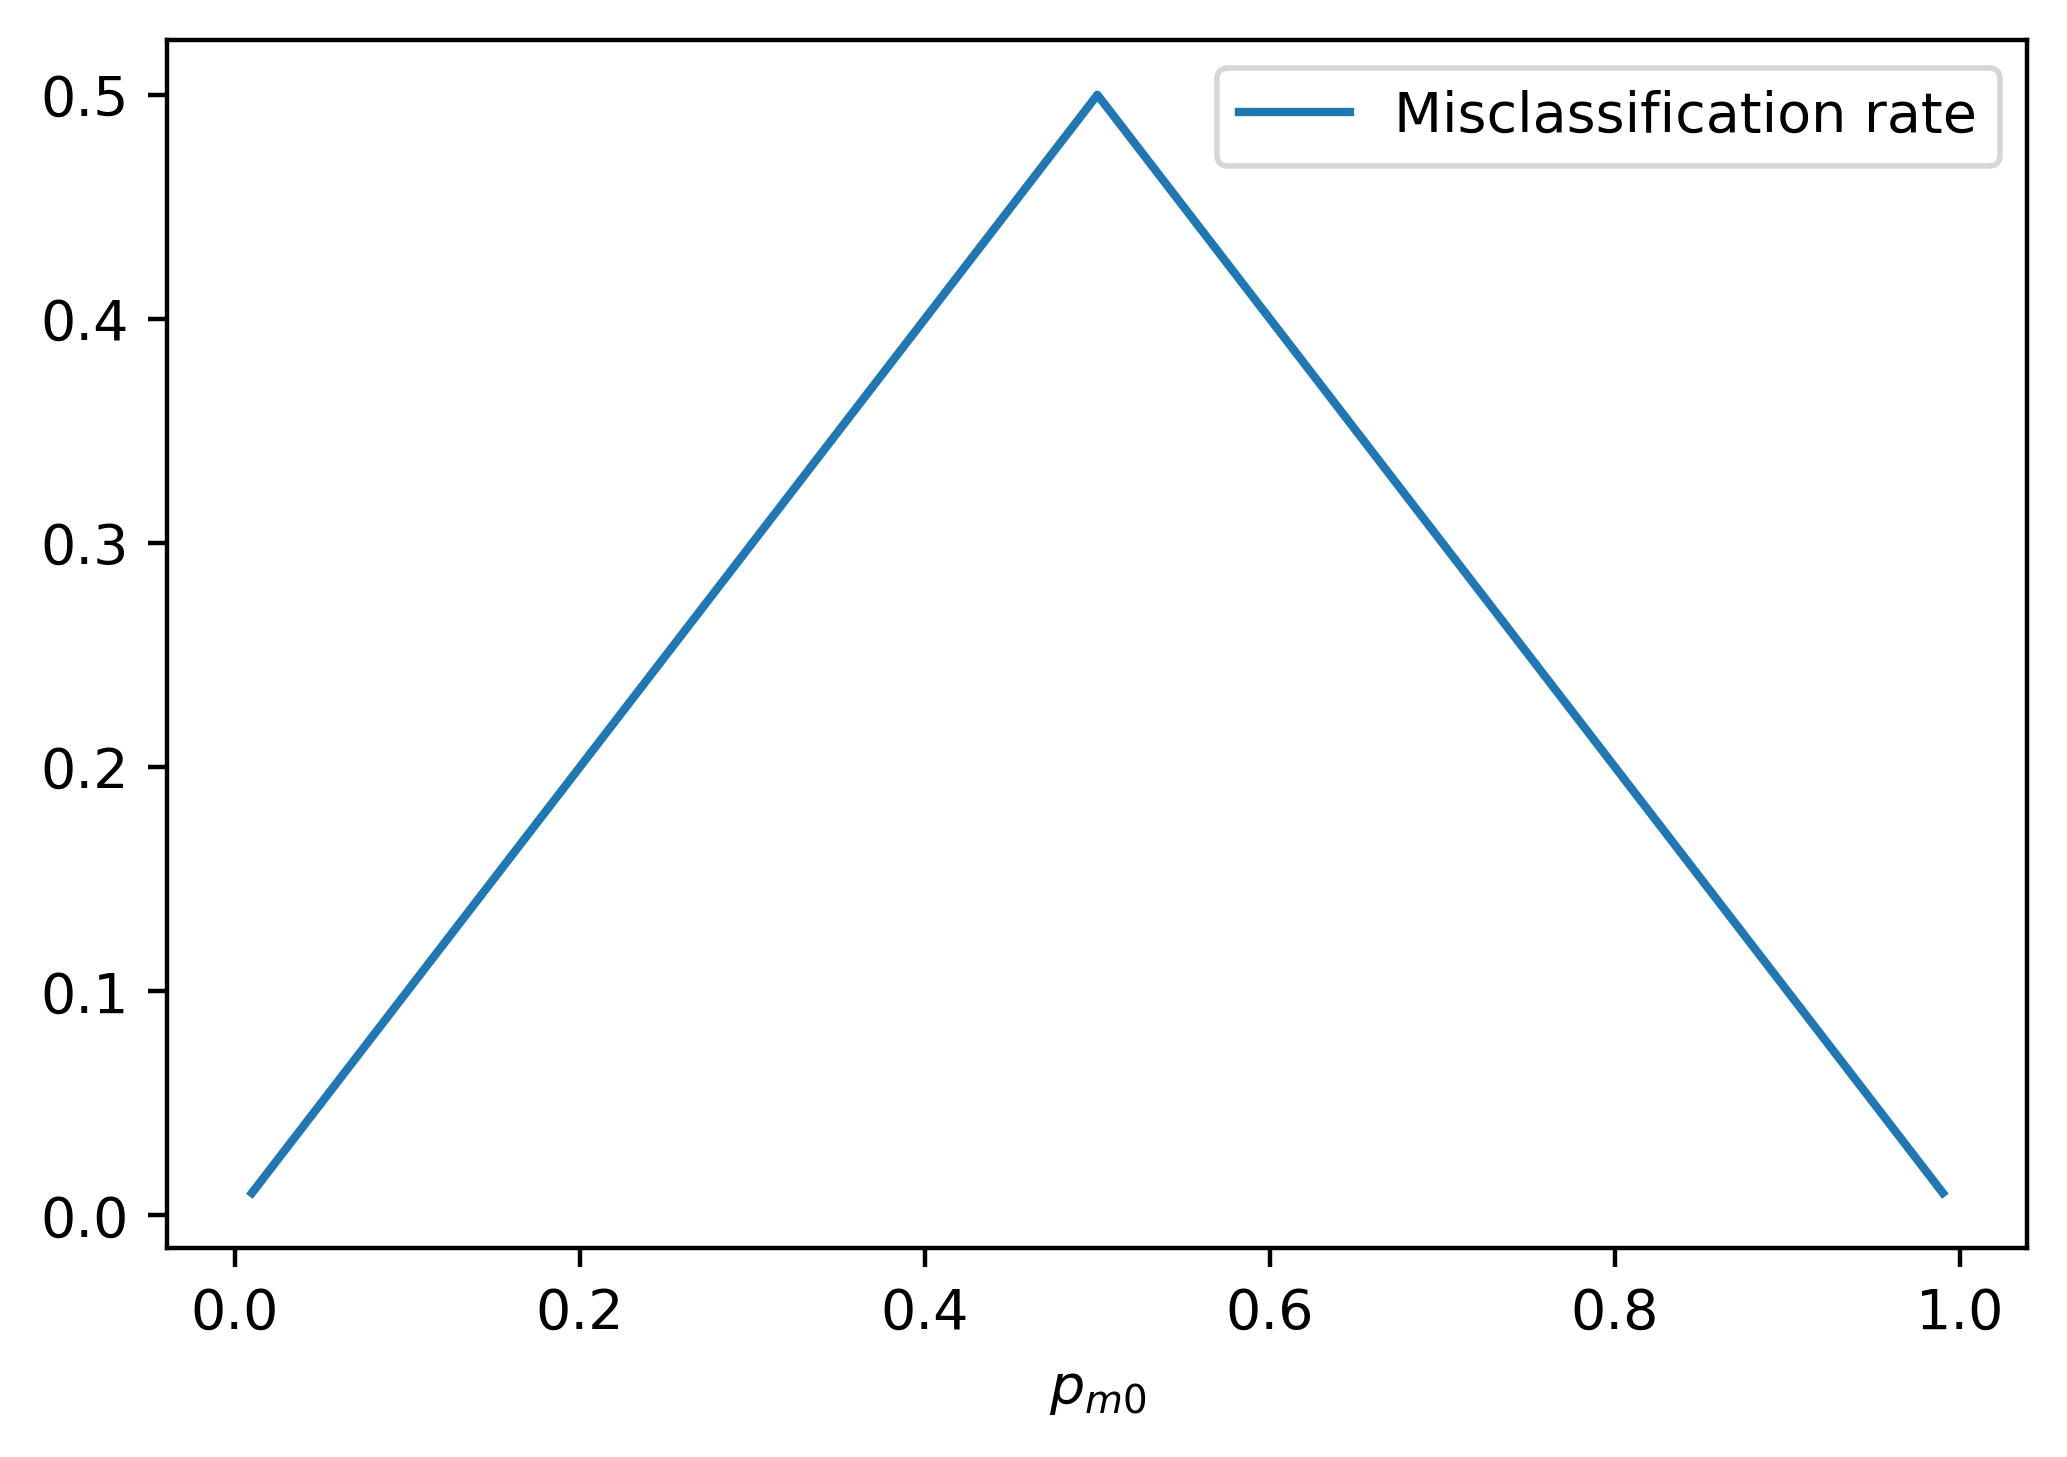

In [28]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [29]:
# Let's calculate the gini impurity
gini = (pm0*(1-pm0)) + (pm1*(1-pm1))
gini

array([0.0198, 0.0392, 0.0582, 0.0768, 0.095 , 0.1128, 0.1302, 0.1472,
       0.1638, 0.18  , 0.1958, 0.2112, 0.2262, 0.2408, 0.255 , 0.2688,
       0.2822, 0.2952, 0.3078, 0.32  , 0.3318, 0.3432, 0.3542, 0.3648,
       0.375 , 0.3848, 0.3942, 0.4032, 0.4118, 0.42  , 0.4278, 0.4352,
       0.4422, 0.4488, 0.455 , 0.4608, 0.4662, 0.4712, 0.4758, 0.48  ,
       0.4838, 0.4872, 0.4902, 0.4928, 0.495 , 0.4968, 0.4982, 0.4992,
       0.4998, 0.5   , 0.4998, 0.4992, 0.4982, 0.4968, 0.495 , 0.4928,
       0.4902, 0.4872, 0.4838, 0.48  , 0.4758, 0.4712, 0.4662, 0.4608,
       0.455 , 0.4488, 0.4422, 0.4352, 0.4278, 0.42  , 0.4118, 0.4032,
       0.3942, 0.3848, 0.375 , 0.3648, 0.3542, 0.3432, 0.3318, 0.32  ,
       0.3078, 0.2952, 0.2822, 0.2688, 0.255 , 0.2408, 0.2262, 0.2112,
       0.1958, 0.18  , 0.1638, 0.1472, 0.1302, 0.1128, 0.095 , 0.0768,
       0.0582, 0.0392, 0.0198])

In [30]:
# Cross entropy
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))
cross_ent

array([0.05600153, 0.09803911, 0.13474217, 0.16794415, 0.19851524,
       0.22696752, 0.25363895, 0.27876937, 0.30253782, 0.32508297,
       0.34651534, 0.36692499, 0.38638671, 0.40496349, 0.42270909,
       0.43966988, 0.45588621, 0.47139349, 0.48622296, 0.50040242,
       0.51395667, 0.52690796, 0.53927634, 0.55107993, 0.56233514,
       0.57305692, 0.58325884, 0.59295332, 0.60215168, 0.6108643 ,
       0.61910066, 0.62686946, 0.63417864, 0.64103548, 0.64744664,
       0.65341819, 0.65895568, 0.66406413, 0.66874809, 0.67301167,
       0.67685855, 0.680292  , 0.68331491, 0.6859298 , 0.68813881,
       0.68994376, 0.6913461 , 0.69234697, 0.69294717, 0.69314718,
       0.69294717, 0.69234697, 0.6913461 , 0.68994376, 0.68813881,
       0.6859298 , 0.68331491, 0.680292  , 0.67685855, 0.67301167,
       0.66874809, 0.66406413, 0.65895568, 0.65341819, 0.64744664,
       0.64103548, 0.63417864, 0.62686946, 0.61910066, 0.6108643 ,
       0.60215168, 0.59295332, 0.58325884, 0.57305692, 0.56233

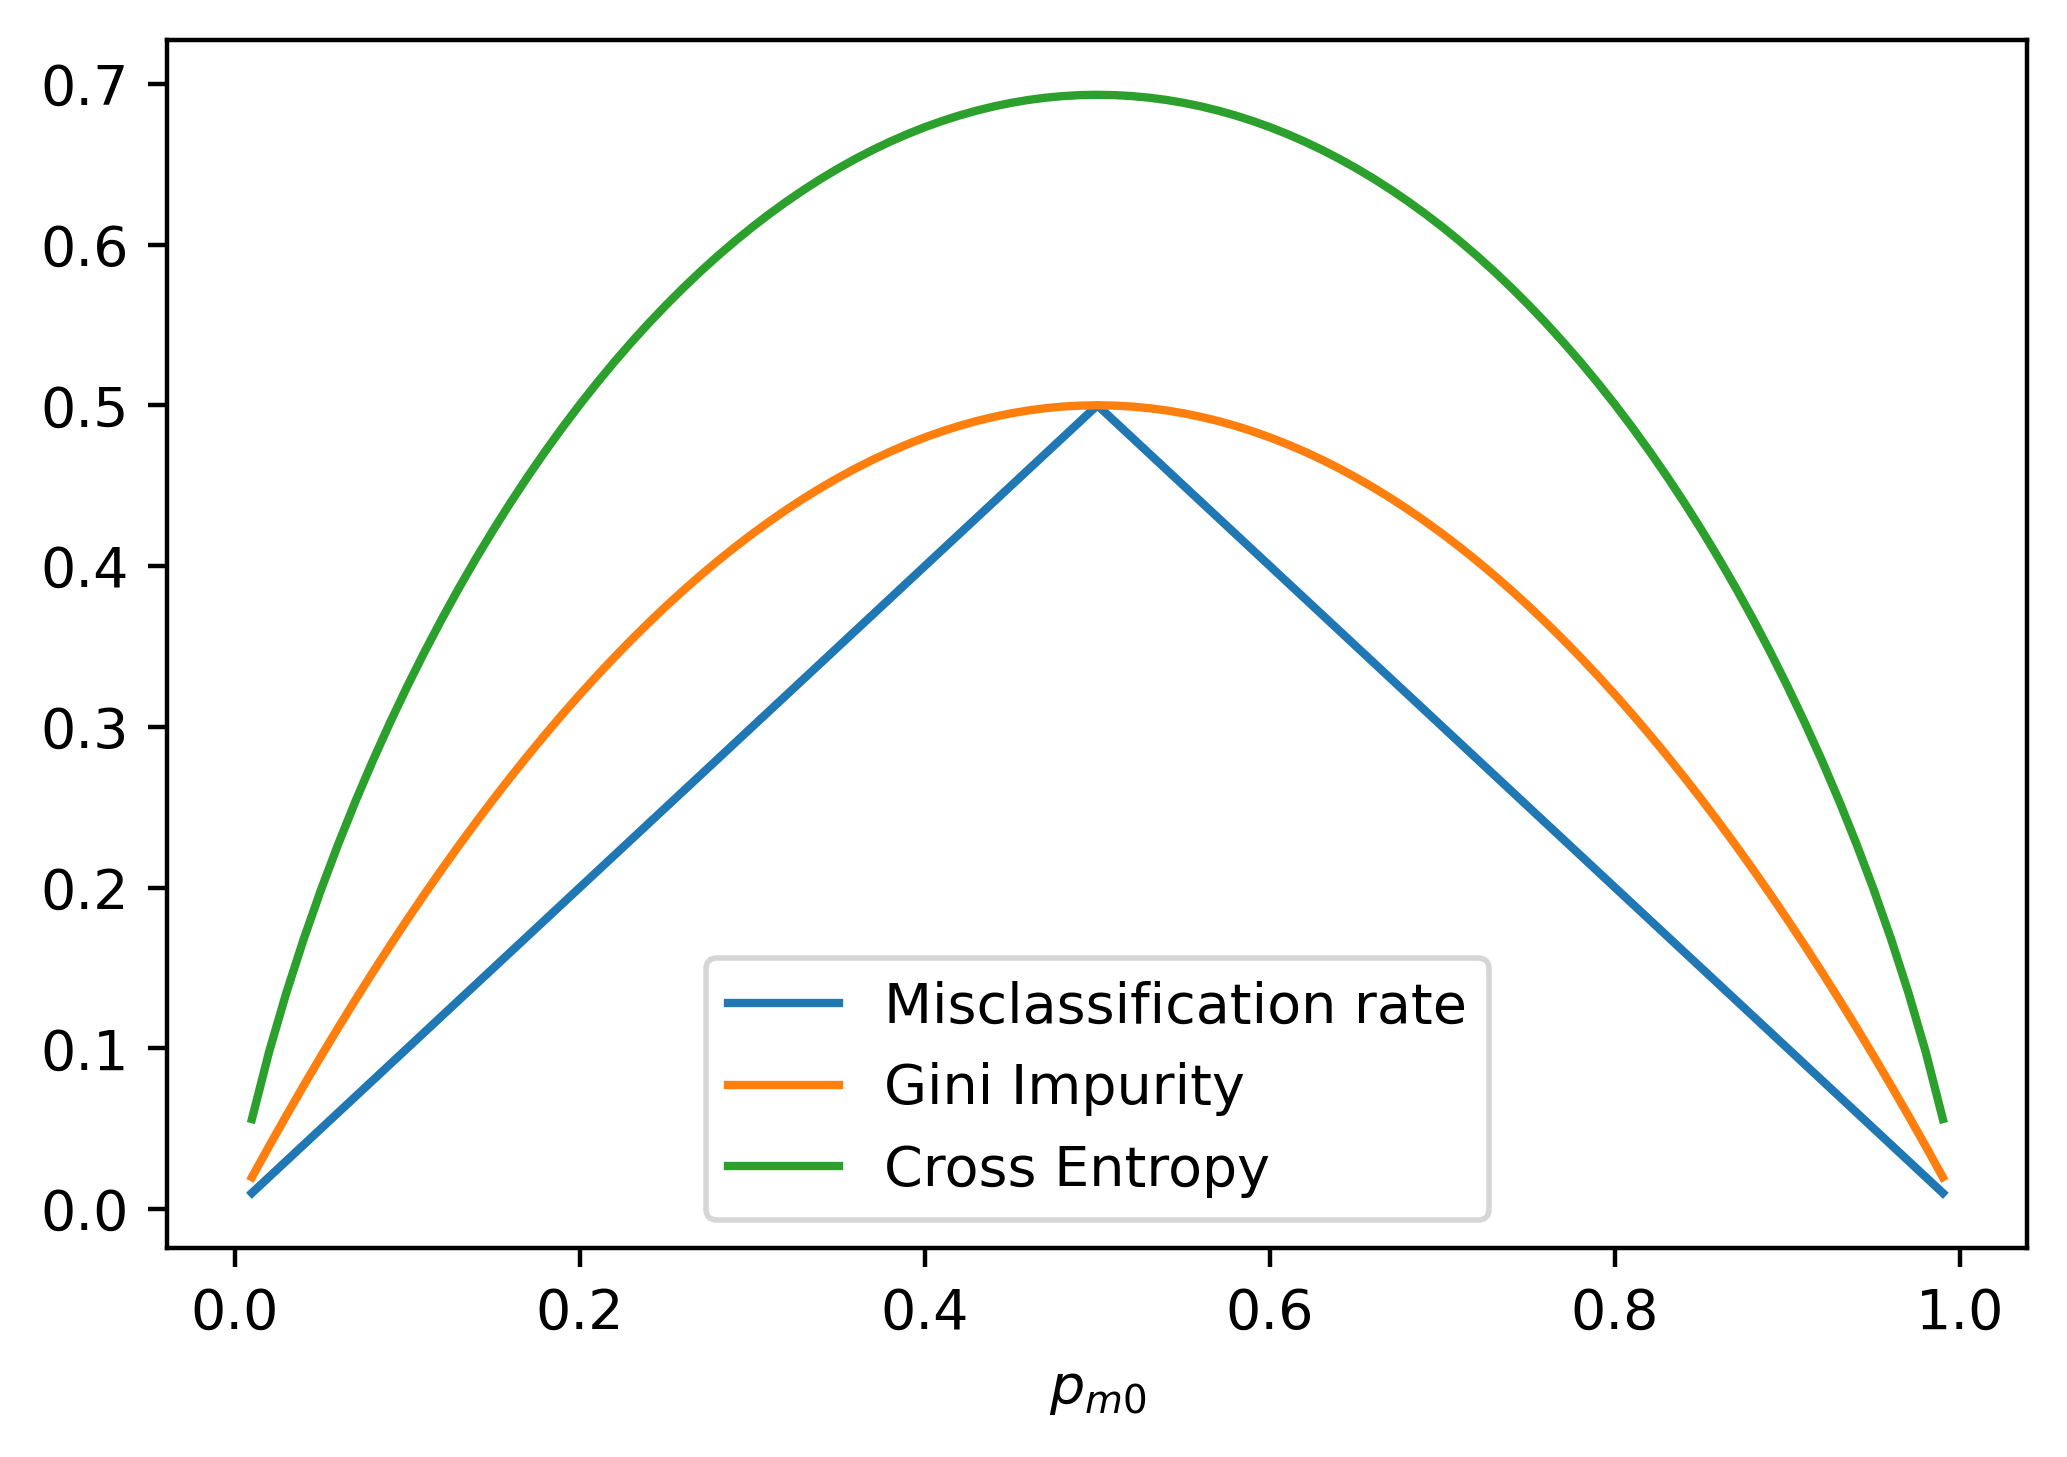

In [31]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini Impurity')
plt.plot(pm0, cross_ent, label='Cross Entropy')
plt.xlabel('$p_{m0}$')
plt.legend()

### Using Decision Trees: Advantages and Predicted Probabilities
  * No Need to Scale Features
  * Non-linear Relationships and Interactions

### Finding Optimal Hyperparameters for a Decision Tree


In [32]:
#import GridSearchcv
from sklearn.model_selection import GridSearchCV

In [33]:
# No of samples in training data
X_train.shape

(21331, 17)

In [34]:
# log2(16000) = 14 (trees)  == here 16,000 is train samples in each fold(4 folds in problem) i.e 
# Let's define a list of parameters for the no of tree
params = {'max_depth':[1,2,4,6,8,10,12]}

In [35]:
# GRidSearchhCV
cv = GridSearchCV(dt,param_grid = params,scoring='roc_auc', n_jobs=None, iid=False,
                  refit=True, cv=4, verbose=1, pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [36]:
cv.fit(X_train,y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   10.4s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, refit=True, return_train_score=True,
             scoring

In [37]:
# Let's chaeck the results
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.059160,0.003113,0.086074,0.136067,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.117483,0.007241,0.006939,0.000102,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.221175,0.006560,0.007641,0.001864,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.345459,0.004175,0.009486,0.000489,6,{'max_depth': 6},0.745011,0.746479,0.753148,0.741517,0.746539,0.004220,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.442933,0.010694,0.008707,0.000419,8,{'max_depth': 8},0.728838,0.731050,0.750087,0.730890,0.735216,0.008630,3,0.812061,0.808353,0.803625,0.802003,0.806510,0.003964
5,0.540386,0.007025,0.009280,0.000455,10,{'max_depth': 10},0.704840,0.703197,0.718070,0.712539,0.709662,0.006000,4,0.848973,0.854292,0.841285,0.836925,0.845369,0.006719
6,0.617802,0.013622,0.009239,0.001075,12,{'max_depth': 12},0.679185,0.659389,0.676519,0.677905,0.673249,0.008058,6,0.888298,0.903704,0.885481,0.875673,0.888289,0.010058


Generally speaking, the "best" combination of hyperparameters is that with the highest average testing score.
According to above results, we can select max_depth = 6 , it has best_score avg

In [38]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

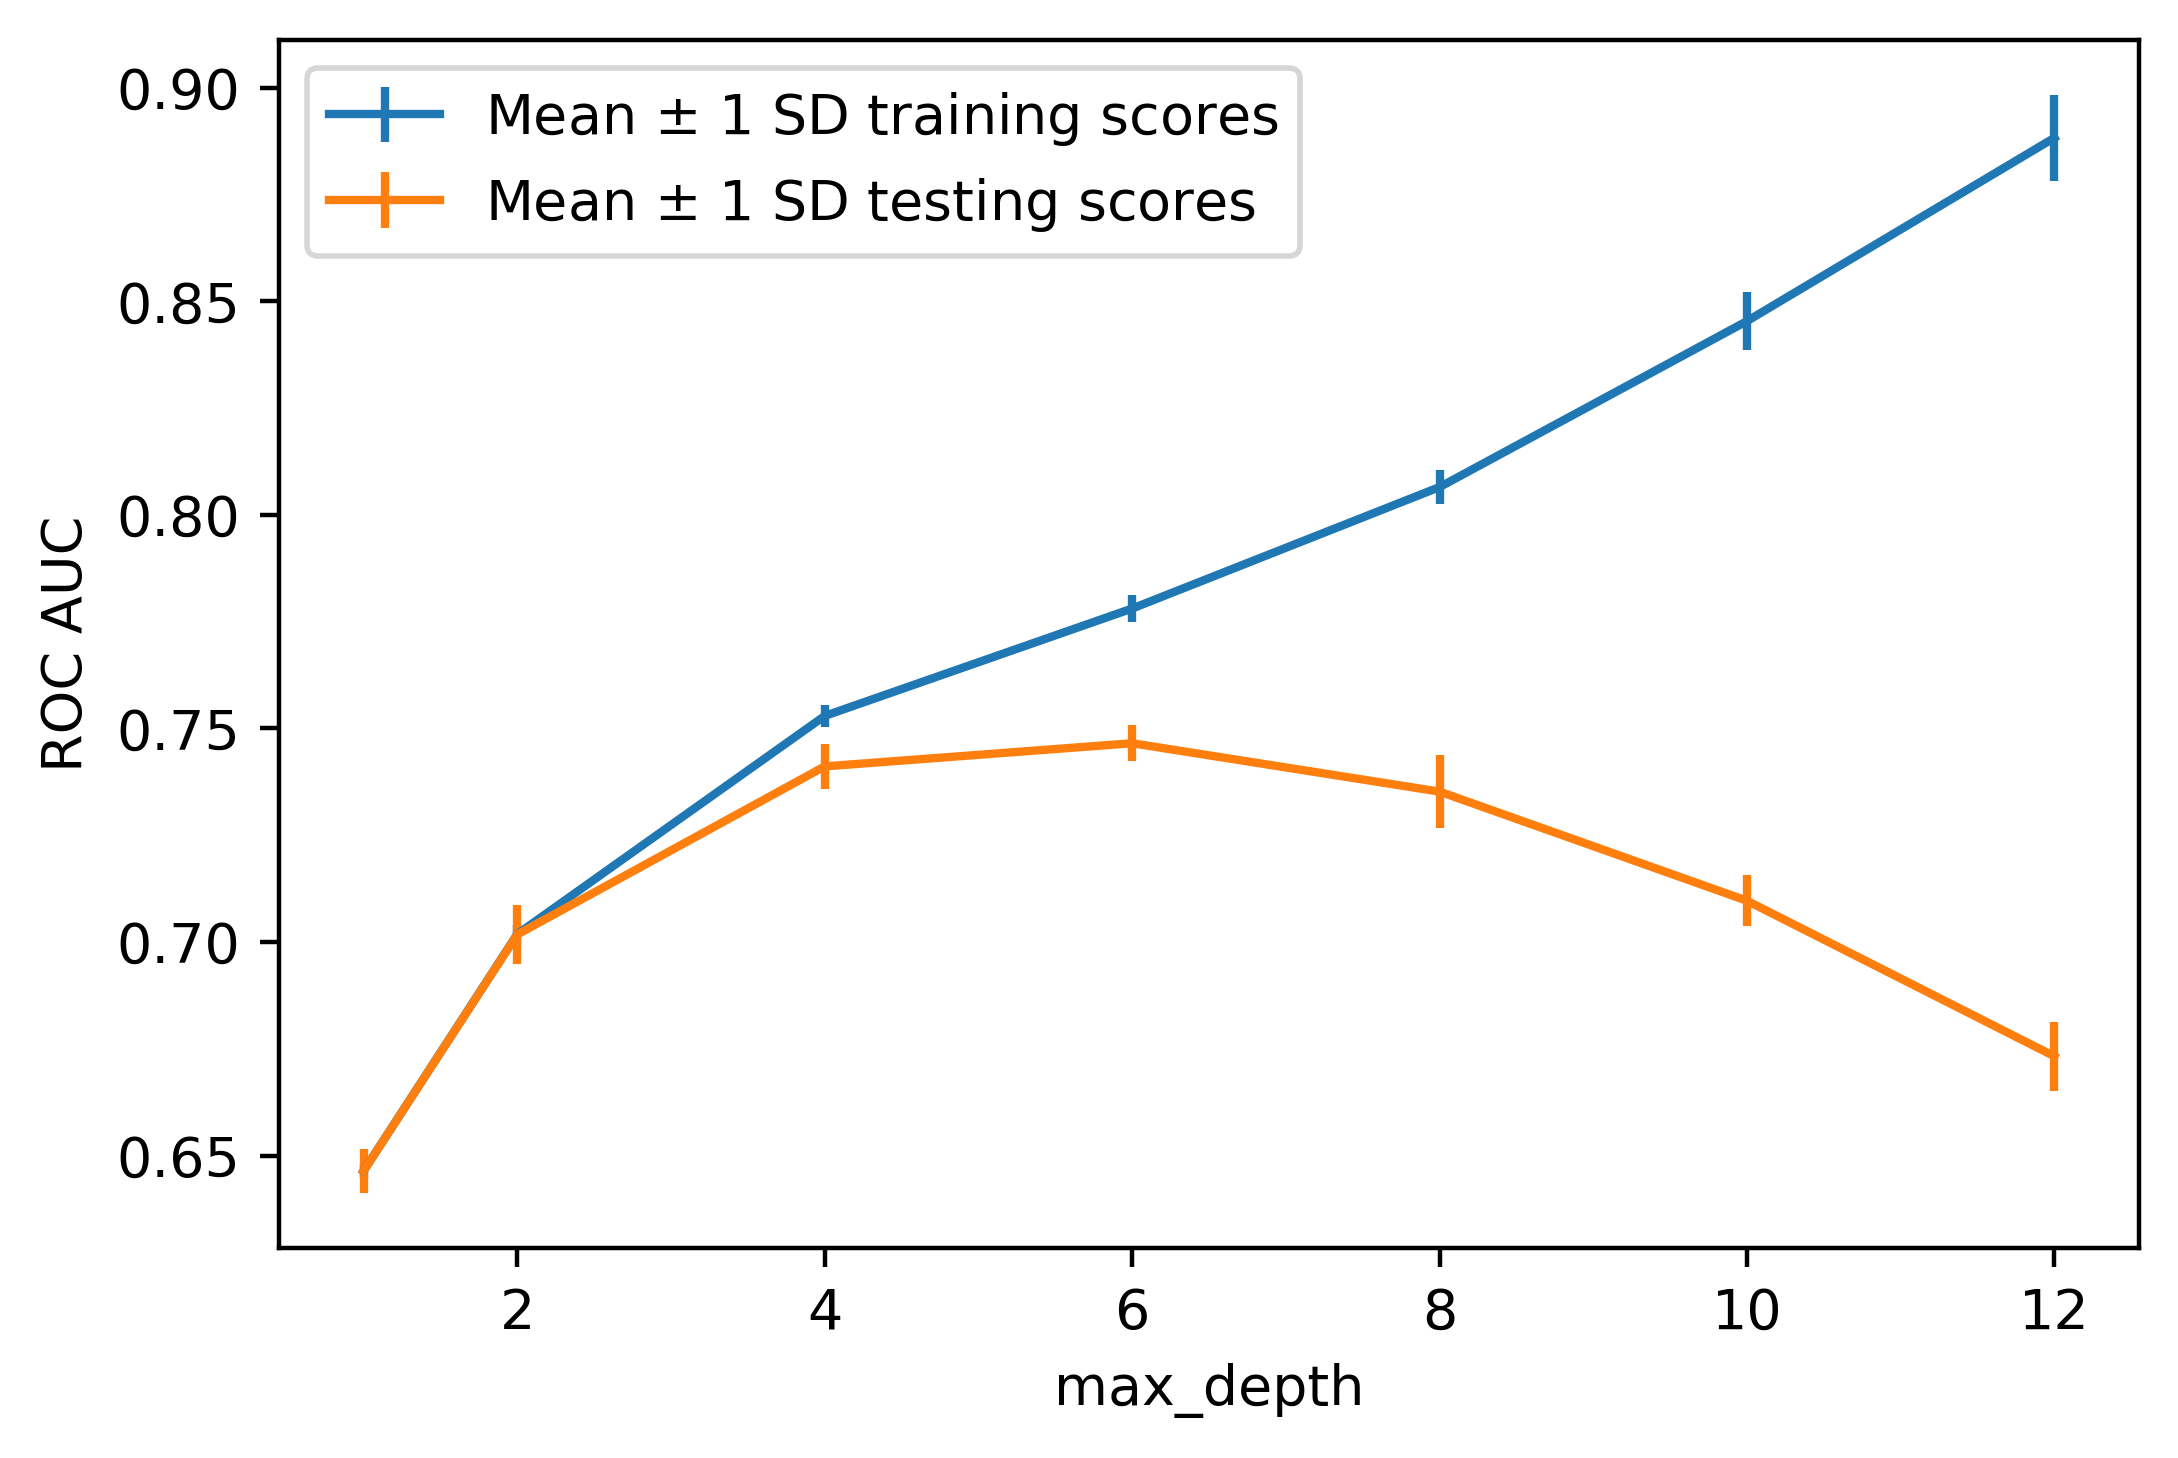

In [39]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

As we go deeper in trees growing our train variance is extremly high, but for test data it wasn't, i.e it's started decresing after  certain trees(after 6)

#### Random Forests: Ensemble of Decision Trees


n_estimators = no of tress

* The number of features considered at each split
* The samples used to grow different trees
* The procedure of using random sampling to create synthetic datasets, and training models on them separately, is called bagging or bootstrapped aggregation

* Bagging : A statistical procedure known as bootstrapping is used, which means to generate new synthetic datasets from the original data.The synthetic datasets are created by randomly selecting samples from the original dataset using replacement.

* Boosting : Another kind of ensemble is a boosting ensemble. The general idea of boosting is to use successive new models of the same type and to train them on the errors of previous models. This way, successive models learn where earlier models didn't do well and correct these errors. 

### Fitting a Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None)

In [42]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [43]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [44]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'n_estimators': [10, 20, 3

In [45]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.350899,0.023381,0.018558,0.002122,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.673824,0.009150,0.032725,0.001623,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.962630,0.010725,0.044739,0.001034,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,1.324372,0.098374,0.061851,0.019576,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,1.634014,0.027508,0.067556,0.001568,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
5,1.976843,0.034660,0.070826,0.007722,60,{'n_estimators': 60},0.748437,0.755604,0.779478,0.770978,0.763624,0.012252,2,0.775419,0.773615,0.766133,0.767032,0.770550,0.004031
6,2.171687,0.358171,0.079602,0.011125,70,{'n_estimators': 70},0.747491,0.754465,0.779104,0.771023,0.763021,0.012620,3,0.774420,0.773379,0.765960,0.766174,0.769983,0.003934
7,2.265252,0.089652,0.083970,0.004905,80,{'n_estimators': 80},0.747424,0.754488,0.778753,0.770872,0.762884,0.012502,5,0.774234,0.773257,0.765978,0.766220,0.769922,0.003840
8,2.524977,0.044620,0.087892,0.010722,90,{'n_estimators': 90},0.747097,0.753794,0.778507,0.770426,0.762456,0.012571,8,0.774095,0.772973,0.766022,0.765748,0.769709,0.003846
9,3.066417,0.110726,0.127194,0.024662,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,6,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750


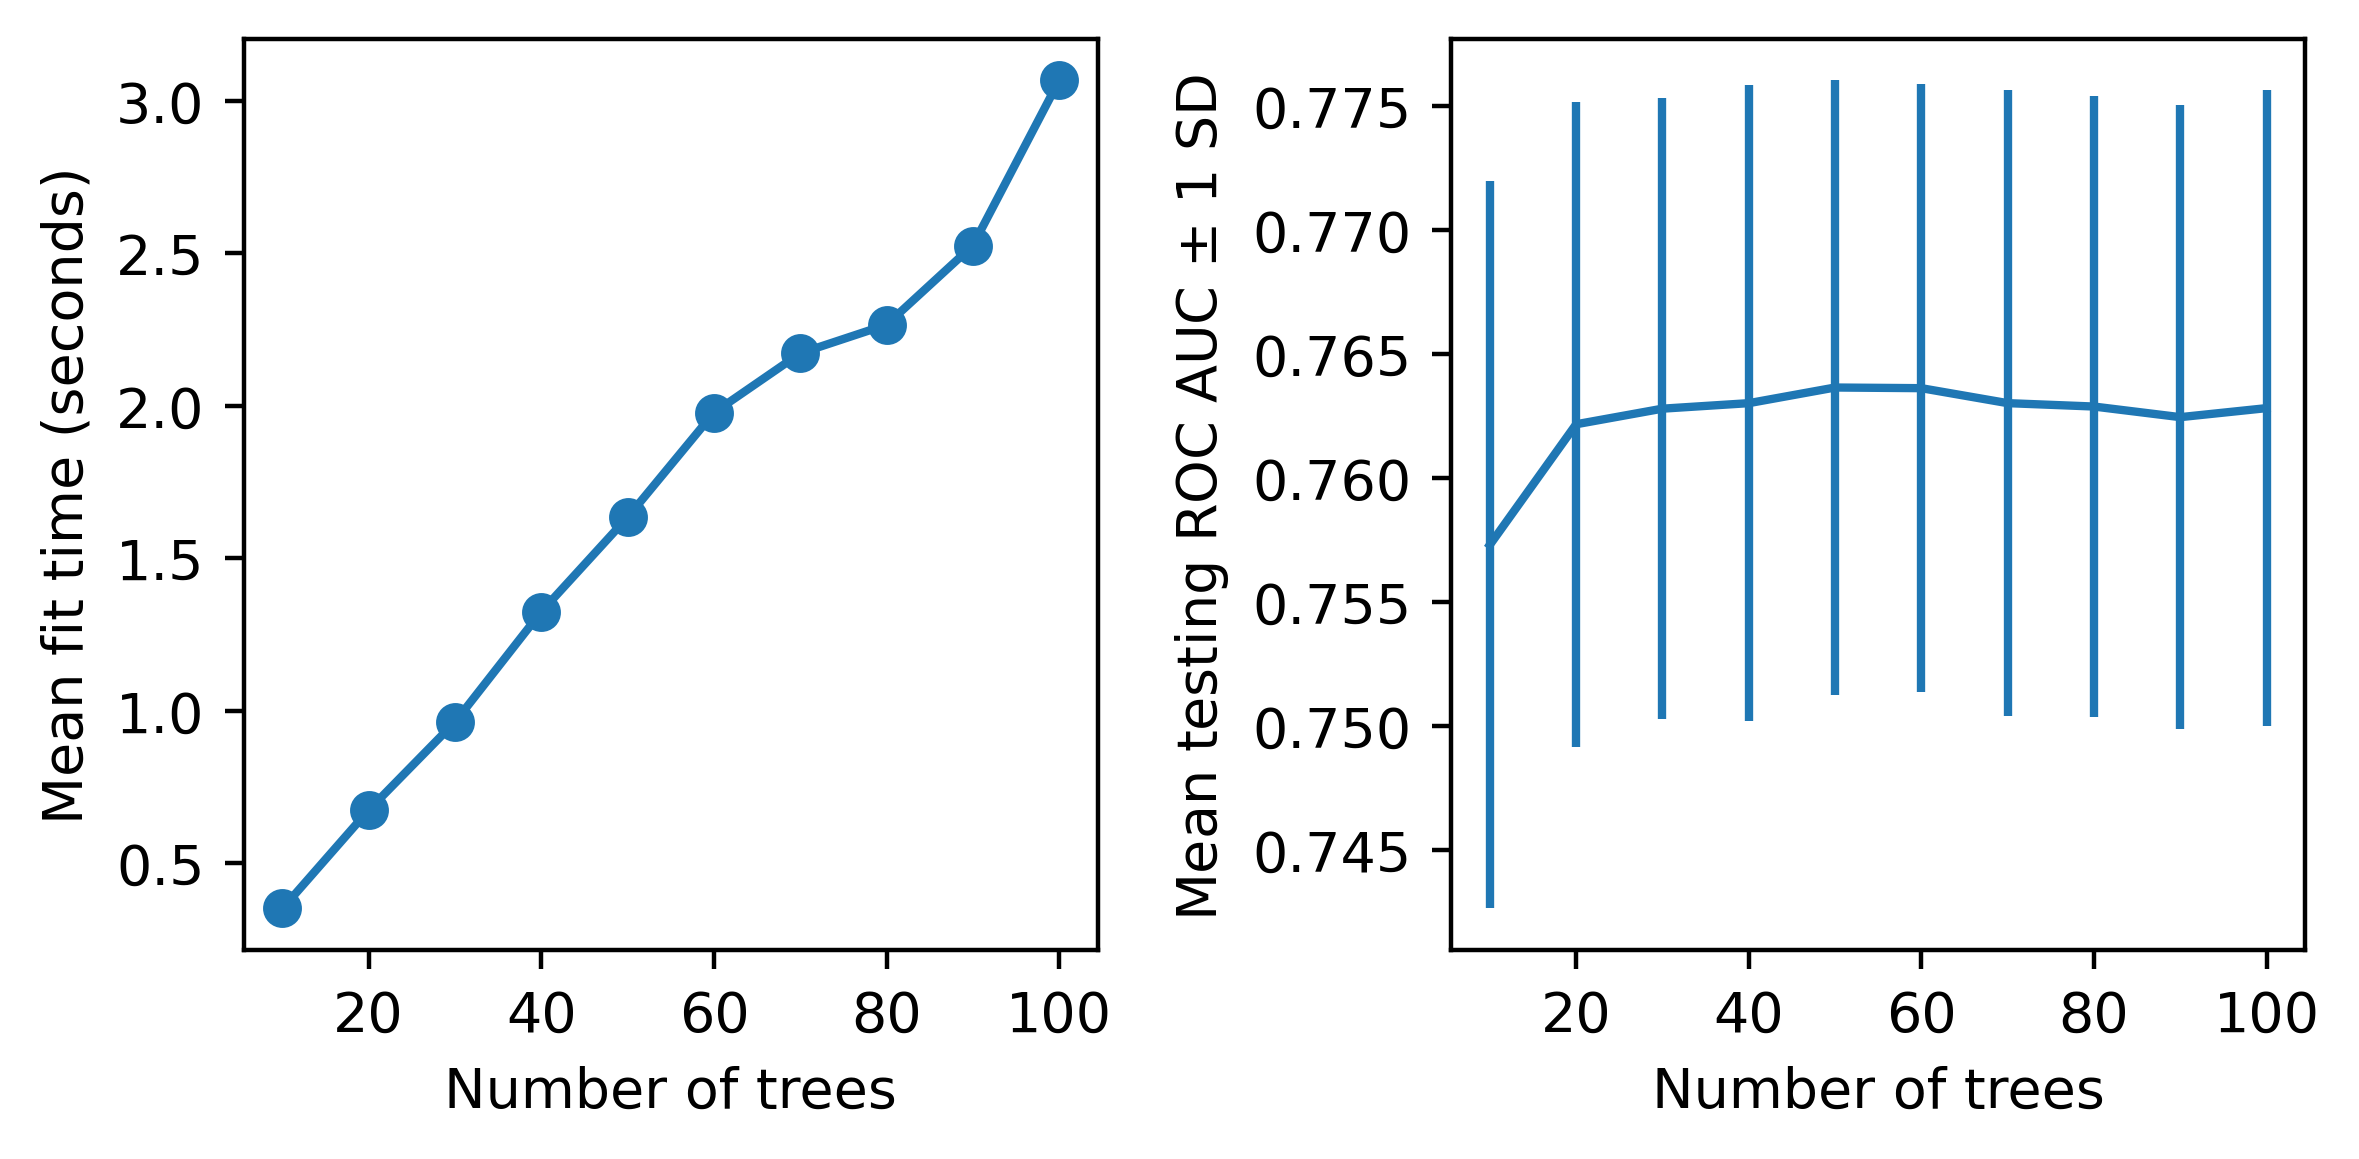

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [47]:
# Best parameters
cv_rf_ex.best_params_

{'n_estimators': 50}

In [48]:
# Feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature Name' : features_response[:-1],
    'Importance' : cv_rf_ex.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance',ascending=False)

,Feature Name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


In [49]:
xx_example,yy_example = np.meshgrid(range(5),range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [50]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

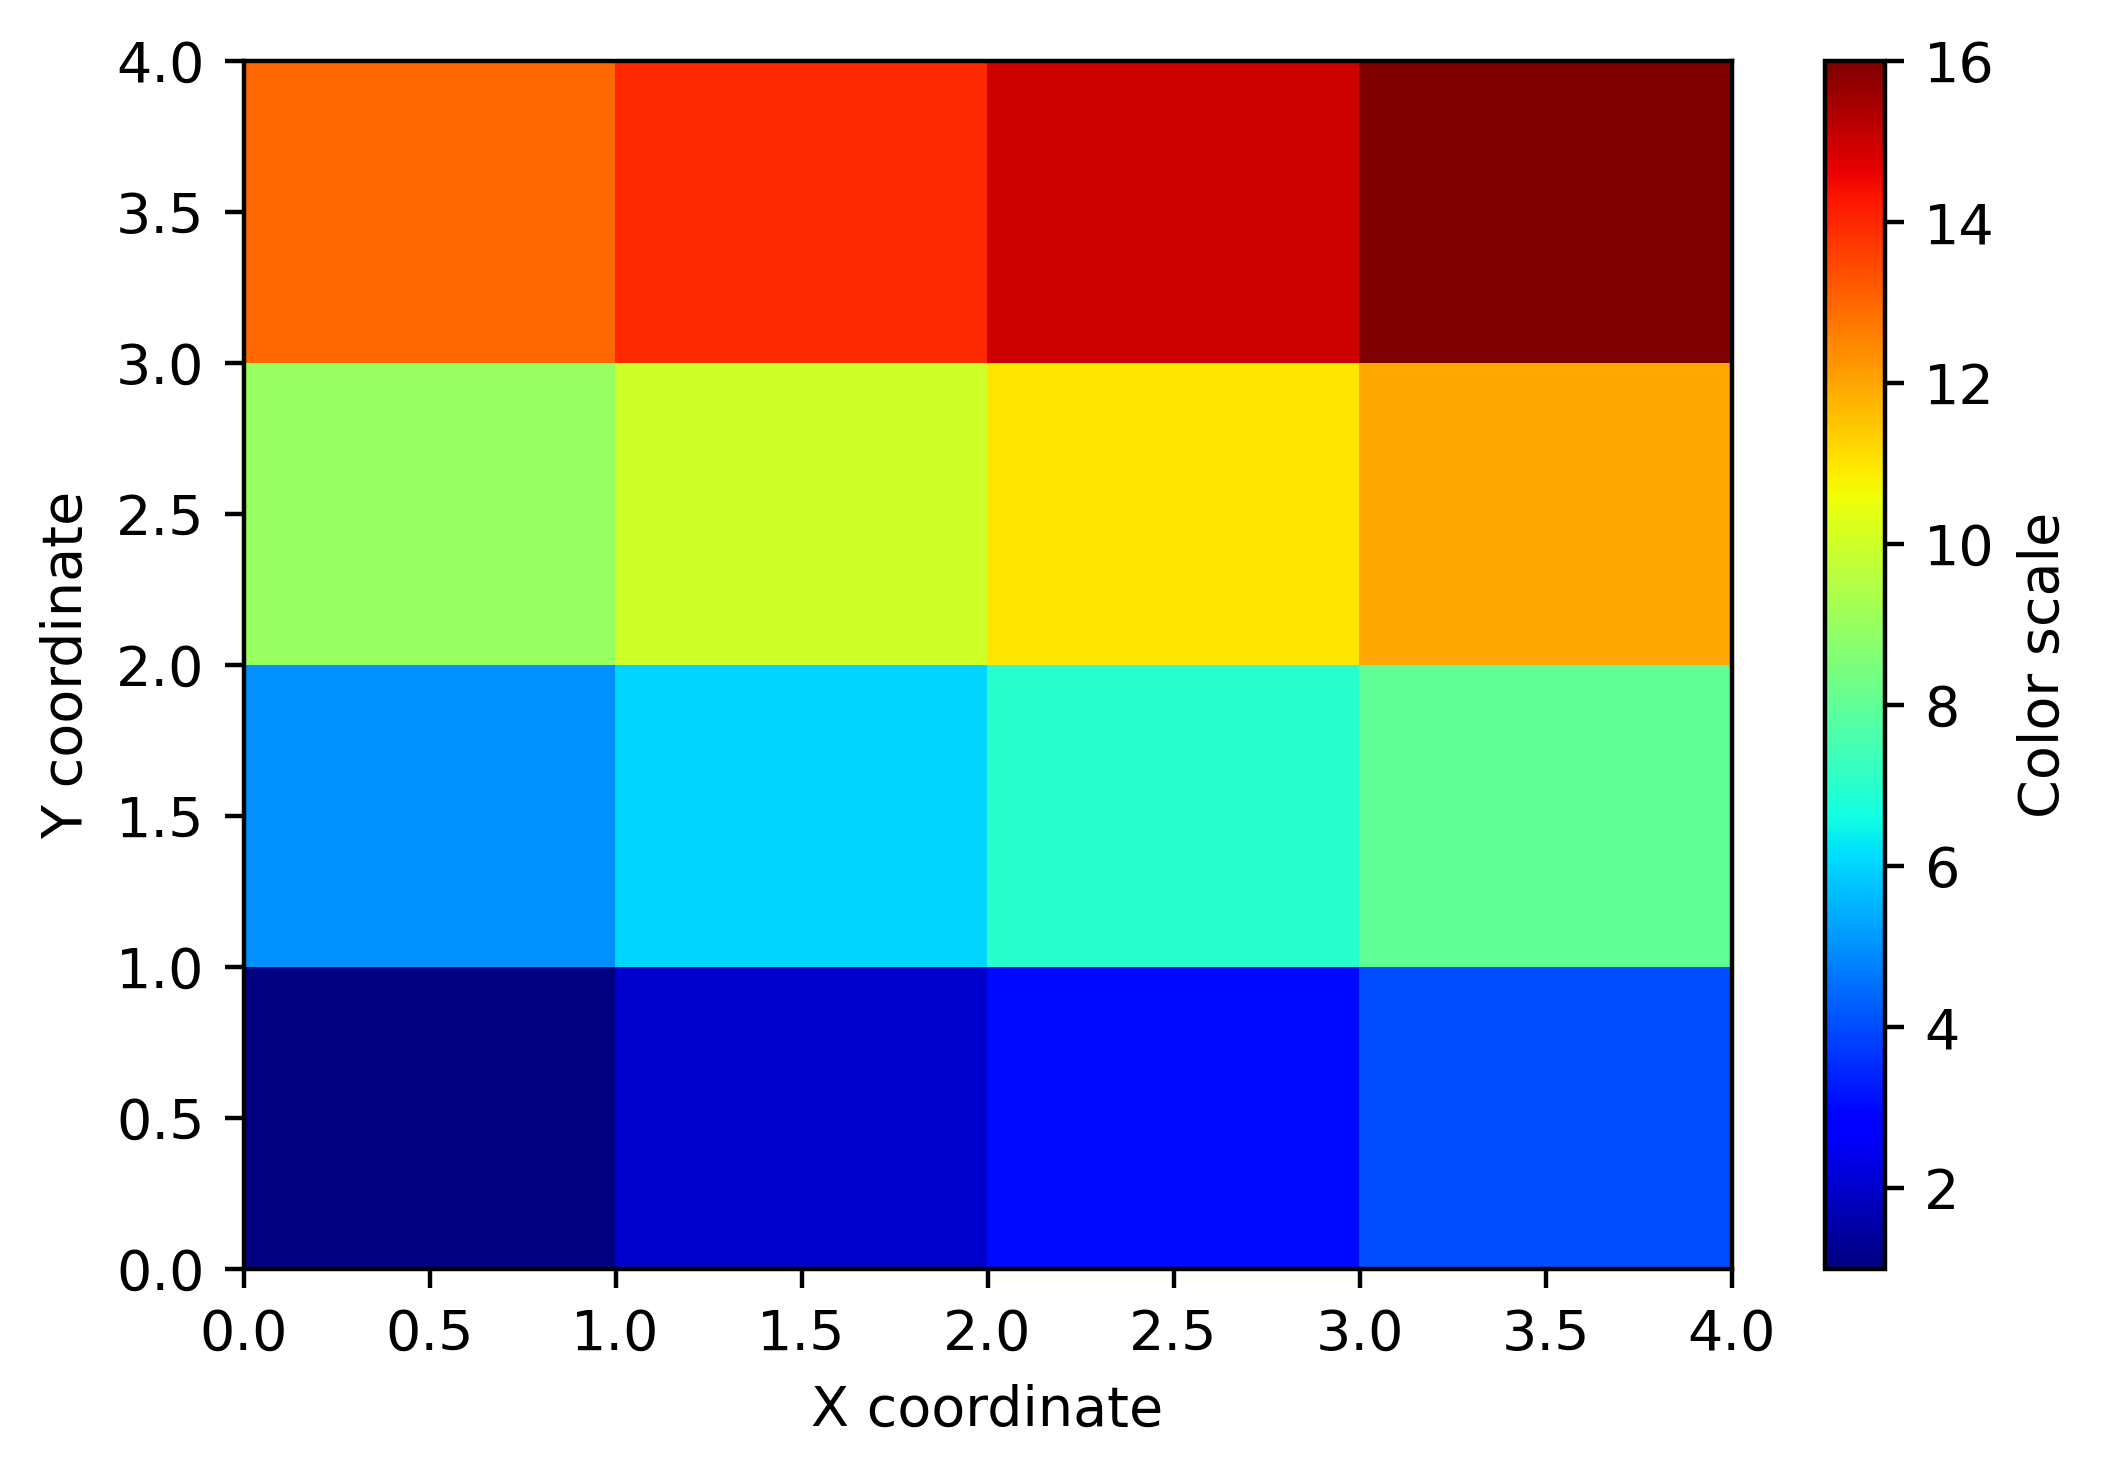

In [51]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')